In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import re
from pathlib import Path
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
file = Path('Resources/Airline_Delay_Cause.csv')

df = pd.read_csv(file) 

In [3]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,4,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",85.0,7.0,3.00,0.00,...,0.0,0.92,0.0,2.0,428.0,250.0,0.0,87.0,0.0,91.0
1,2023,4,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",46.0,5.0,3.63,0.61,...,0.0,0.00,0.0,1.0,272.0,153.0,67.0,52.0,0.0,0.0
2,2023,4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",61.0,5.0,0.68,0.07,...,0.0,0.93,0.0,1.0,204.0,36.0,2.0,141.0,0.0,25.0
3,2023,4,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",211.0,29.0,9.86,1.00,...,0.0,13.93,1.0,0.0,1346.0,384.0,39.0,115.0,0.0,808.0
4,2023,4,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1390.0,140.0,41.20,5.11,...,0.0,64.59,0.0,2.0,12486.0,4655.0,403.0,1190.0,0.0,6238.0


In [86]:
df.iloc[96839]

year                                    2019
month                                      3
carrier                                   OO
carrier_name           SkyWest Airlines Inc.
airport                                  CAK
arr_flights                              1.0
nas_ct                                   0.0
arr_delay                                0.0
carrier_delay                            0.0
weather_delay                            0.0
nas_delay                                0.0
security_delay                           0.0
late_aircraft_delay                      0.0
Name: 82240, dtype: object

In [4]:
#ontime_df = df[df["arr_delay"]<= 15.0]
#ontime_df

In [5]:
# Review columns in data
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [6]:
# Check data types
df.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [7]:
# Review unique carrier names to identify what will be excluded
df.carrier_name.unique()

array(['Endeavor Air Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
       'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Southwest Airlines Co.',
       'Republic Airline', 'Horizon Air', 'Mesa Airlines Inc.',
       'ExpressJet Airlines LLC', 'ExpressJet Airlines Inc.'],
      dtype=object)

In [8]:
df = df.drop(['arr_del15','carrier_ct','weather_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted','airport_name'], axis=1, errors='ignore')
df.head()


,year,month,carrier,carrier_name,airport,arr_flights,nas_ct,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,4,9E,Endeavor Air Inc.,ABY,85.0,3.08,428.0,250.0,0.0,87.0,0.0,91.0
1,2023,4,9E,Endeavor Air Inc.,AEX,46.0,0.76,272.0,153.0,67.0,52.0,0.0,0.0
2,2023,4,9E,Endeavor Air Inc.,AGS,61.0,3.32,204.0,36.0,2.0,141.0,0.0,25.0
3,2023,4,9E,Endeavor Air Inc.,ALB,211.0,4.21,1346.0,384.0,39.0,115.0,0.0,808.0
4,2023,4,9E,Endeavor Air Inc.,ATL,1390.0,29.09,12486.0,4655.0,403.0,1190.0,0.0,6238.0


In [9]:
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()}null values")

Column year has 0null values
Column month has 0null values
Column carrier has 0null values
Column carrier_name has 0null values
Column airport has 0null values
Column arr_flights has 151null values
Column nas_ct has 151null values
Column arr_delay has 151null values
Column carrier_delay has 151null values
Column weather_delay has 151null values
Column nas_delay has 151null values
Column security_delay has 151null values
Column late_aircraft_delay has 151null values


In [10]:
df_cleaned = df.dropna()
print(df_cleaned)

        year  month carrier       carrier_name airport  arr_flights  nas_ct  \
0       2023      4      9E  Endeavor Air Inc.     ABY         85.0    3.08   
1       2023      4      9E  Endeavor Air Inc.     AEX         46.0    0.76   
2       2023      4      9E  Endeavor Air Inc.     AGS         61.0    3.32   
3       2023      4      9E  Endeavor Air Inc.     ALB        211.0    4.21   
4       2023      4      9E  Endeavor Air Inc.     ATL       1390.0   29.09   
...      ...    ...     ...                ...     ...          ...     ...   
101507  2018      4      YX   Republic Airline     SYR        180.0    8.03   
101508  2018      4      YX   Republic Airline     TLH         56.0    2.49   
101509  2018      4      YX   Republic Airline     TUL         58.0    1.25   
101510  2018      4      YX   Republic Airline     TVC          1.0    0.00   
101511  2018      4      YX   Republic Airline     XNA        105.0   12.28   

        arr_delay  carrier_delay  weather_delay  na

In [11]:
# Sort by column
df.sort_values(by=['arr_delay'], inplace = True, ascending=False)
df.head()

,year,month,carrier,carrier_name,airport,arr_flights,nas_ct,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
96839,2018,6,DL,Delta Air Lines Inc.,ATL,21029.0,1515.76,370937.0,108068.0,19018.0,112018.0,167.0,131666.0
1667,2023,3,AA,American Airlines Inc.,DFW,13234.0,999.84,337375.0,118554.0,15718.0,47438.0,403.0,155262.0
78978,2019,5,AA,American Airlines Inc.,DFW,13392.0,1317.75,329847.0,83637.0,23749.0,97283.0,92.0,125086.0
6287,2022,12,AA,American Airlines Inc.,DFW,12352.0,752.72,323449.0,109989.0,17848.0,36628.0,331.0,158653.0
36971,2021,6,AA,American Airlines Inc.,DFW,13036.0,861.12,305694.0,105806.0,14883.0,53140.0,1112.0,130753.0


In [12]:
airline_count = df.groupby(['carrier_name']).sum()["arr_flights"]
airline_count

carrier_name
Alaska Airlines Inc.        1098099.0
Allegiant Air                548321.0
American Airlines Inc.      4125781.0
Delta Air Lines Inc.        4251966.0
Endeavor Air Inc.           1220281.0
Envoy Air                   1344771.0
ExpressJet Airlines Inc.     181330.0
ExpressJet Airlines LLC      149234.0
Frontier Airlines Inc.       665621.0
Hawaiian Airlines Inc.       341771.0
Horizon Air                  200419.0
JetBlue Airways             1243639.0
Mesa Airlines Inc.           806754.0
PSA Airlines Inc.           1193395.0
Republic Airline            1542383.0
SkyWest Airlines Inc.       3726533.0
Southwest Airlines Co.      6174278.0
Spirit Air Lines             985326.0
United Air Lines Inc.       2721614.0
Name: arr_flights, dtype: float64

In [13]:
# Total weather delays by month of year.
weather_delay = df.groupby(["carrier_name"]).sum()["weather_delay"]
weather_delay.sort_values()

carrier_name
Horizon Air                   80255.0
Hawaiian Airlines Inc.        83230.0
ExpressJet Airlines LLC      101006.0
ExpressJet Airlines Inc.     123324.0
Frontier Airlines Inc.       251227.0
Alaska Airlines Inc.         334525.0
Spirit Air Lines             540543.0
JetBlue Airways              659739.0
Allegiant Air                669644.0
Republic Airline             880828.0
PSA Airlines Inc.            952418.0
Endeavor Air Inc.            956955.0
Mesa Airlines Inc.          1089238.0
Southwest Airlines Co.      1368224.0
Envoy Air                   1504944.0
United Air Lines Inc.       1985934.0
Delta Air Lines Inc.        2365131.0
American Airlines Inc.      2871808.0
SkyWest Airlines Inc.       5672234.0
Name: weather_delay, dtype: float64

In [14]:
nas_delay = df.groupby(["carrier_name"]).sum()["nas_delay"]
nas_delay.sort_values()

carrier_name
Hawaiian Airlines Inc.         63780.0
Horizon Air                   252071.0
ExpressJet Airlines LLC       927317.0
ExpressJet Airlines Inc.     1032905.0
Allegiant Air                1714806.0
Mesa Airlines Inc.           1776595.0
PSA Airlines Inc.            2312254.0
Frontier Airlines Inc.       2654336.0
Alaska Airlines Inc.         3078395.0
Endeavor Air Inc.            3169578.0
Envoy Air                    3795059.0
JetBlue Airways              4820113.0
Republic Airline             5269891.0
SkyWest Airlines Inc.        5559996.0
Spirit Air Lines             5576435.0
Delta Air Lines Inc.         8716862.0
Southwest Airlines Co.       8776336.0
United Air Lines Inc.        9427681.0
American Airlines Inc.      10335113.0
Name: nas_delay, dtype: float64

In [15]:
security_delay = df.groupby(["carrier_name"]).sum()["security_delay"]
security_delay.sort_values()

carrier_name
Frontier Airlines Inc.           0.0
ExpressJet Airlines LLC          0.0
ExpressJet Airlines Inc.         0.0
Horizon Air                   4719.0
Endeavor Air Inc.             5544.0
United Air Lines Inc.         5589.0
Hawaiian Airlines Inc.       12098.0
Mesa Airlines Inc.           15194.0
Republic Airline             16737.0
Envoy Air                    18937.0
PSA Airlines Inc.            26757.0
Allegiant Air                34299.0
Alaska Airlines Inc.         55328.0
Delta Air Lines Inc.         56536.0
JetBlue Airways              58526.0
SkyWest Airlines Inc.        73740.0
Spirit Air Lines             95802.0
American Airlines Inc.      125918.0
Southwest Airlines Co.      178936.0
Name: security_delay, dtype: float64

In [16]:
# keep airlines that will  be used in our project
carrier_name = ["American Airlines Inc.","Spirit Air Lines","Delta Air Lines Inc.","United Air Lines Inc.","Southwest Airlines Co."]
filter_df = df[df["carrier_name"].isin(carrier_name)]
filter_df = filter_df.dropna()


In [17]:
# Confirm that airlines were kept
filter_df["carrier_name"].value_counts()

Delta Air Lines Inc.      8074
American Airlines Inc.    6364
United Air Lines Inc.     6077
Southwest Airlines Co.    5827
Spirit Air Lines          3072
Name: carrier_name, dtype: int64

In [18]:

filter_df.head(2).append(filter_df.tail(2))

C:\Users\Chloe\AppData\Local\Temp\ipykernel_8128\1326728638.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filter_df.head(2).append(filter_df.tail(2))


,year,month,carrier,carrier_name,airport,arr_flights,nas_ct,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
96839,2018,6,DL,Delta Air Lines Inc.,ATL,21029.0,1515.76,370937.0,108068.0,19018.0,112018.0,167.0,131666.0
1667,2023,3,AA,American Airlines Inc.,DFW,13234.0,999.84,337375.0,118554.0,15718.0,47438.0,403.0,155262.0
6557,2022,12,DL,Delta Air Lines Inc.,DLH,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
45004,2021,1,AA,American Airlines Inc.,ABQ,4.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
col=['year', 'month', 'carrier', 'carrier_name', 'airport', 'arr_flights',
       'arr_delay']
filter_df=filter_df[col]

In [83]:
flight_status = []
for row in filter_df["arr_delay"]:
    if row > 15.0: 
        flight_status.append(1)
        print(row)
        break
    elif row < 15.0: flight_status.append(0)
    else: flight_status.append(2)

370937.0


In [84]:
filter_df[filter_df["arr_delay"]>15.0]

,year,month,carrier,carrier_name,airport,arr_flights,arr_delay,flight_status
96839,2018,6,DL,Delta Air Lines Inc.,ATL,21029.0,370937.0,1
1667,2023,3,AA,American Airlines Inc.,DFW,13234.0,337375.0,1
78978,2019,5,AA,American Airlines Inc.,DFW,13392.0,329847.0,1
6287,2022,12,AA,American Airlines Inc.,DFW,12352.0,323449.0,1
36971,2021,6,AA,American Airlines Inc.,DFW,13036.0,305694.0,1
...,...,...,...,...,...,...,...,...
84976,2019,1,UA,United Air Lines Inc.,ITO,17.0,16.0,1
12076,2022,9,NK,Spirit Air Lines,CRW,12.0,16.0,1
83274,2019,2,DL,Delta Air Lines Inc.,PHF,28.0,16.0,1
32091,2021,9,DL,Delta Air Lines Inc.,ILM,47.0,16.0,1


In [65]:
# 1 = flight delayed
# 0 = On-time
# 2 = canceled
filter_df["flight_status"] = flight_status
filter_df.tail()

,year,month,carrier,carrier_name,airport,arr_flights,arr_delay,flight_status
54304,2020,7,DL,Delta Air Lines Inc.,CHA,1.0,0.0,0
54303,2020,7,DL,Delta Air Lines Inc.,CAE,2.0,0.0,0
54288,2020,7,DL,Delta Air Lines Inc.,AGS,1.0,0.0,0
6557,2022,12,DL,Delta Air Lines Inc.,DLH,2.0,0.0,0
45004,2021,1,AA,American Airlines Inc.,ABQ,4.0,0.0,0


In [66]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(filter_df)
dummies

,year,month,arr_flights,arr_delay,flight_status,carrier_AA,carrier_DL,carrier_NK,carrier_UA,carrier_WN,...,airport_SYR,airport_TLH,airport_TPA,airport_TRI,airport_TUL,airport_TUS,airport_TVC,airport_TYS,airport_VPS,airport_XNA
96839,2018,6,21029.0,370937.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1667,2023,3,13234.0,337375.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78978,2019,5,13392.0,329847.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6287,2022,12,12352.0,323449.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36971,2021,6,13036.0,305694.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54304,2020,7,1.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54303,2020,7,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54288,2020,7,1.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6557,2022,12,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
dummies.dropna()

,year,month,arr_flights,arr_delay,flight_status,carrier_AA,carrier_DL,carrier_NK,carrier_UA,carrier_WN,...,airport_SYR,airport_TLH,airport_TPA,airport_TRI,airport_TUL,airport_TUS,airport_TVC,airport_TYS,airport_VPS,airport_XNA
96839,2018,6,21029.0,370937.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1667,2023,3,13234.0,337375.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78978,2019,5,13392.0,329847.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6287,2022,12,12352.0,323449.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36971,2021,6,13036.0,305694.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54304,2020,7,1.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54303,2020,7,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54288,2020,7,1.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6557,2022,12,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Define features set
X = dummies.copy()
X.drop("flight_status", axis=1, inplace=True)
X.dropna()

,year,month,arr_flights,arr_delay,carrier_AA,carrier_DL,carrier_NK,carrier_UA,carrier_WN,carrier_name_American Airlines Inc.,...,airport_SYR,airport_TLH,airport_TPA,airport_TRI,airport_TUL,airport_TUS,airport_TVC,airport_TYS,airport_VPS,airport_XNA
96839,2018,6,21029.0,370937.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1667,2023,3,13234.0,337375.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
78978,2019,5,13392.0,329847.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6287,2022,12,12352.0,323449.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36971,2021,6,13036.0,305694.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54304,2020,7,1.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54303,2020,7,2.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54288,2020,7,1.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6557,2022,12,2.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
del X["arr_delay"]

In [70]:
# Define target vector
y = dummies["flight_status"].ravel()
y[:5]


array([1, 1, 1, 1, 1], dtype=int64)

In [71]:
dummies['flight_status'].value_counts()

1    28574
0      808
2       32
Name: flight_status, dtype: int64

In [72]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [73]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [74]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [75]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [76]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [77]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [78]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [79]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
class_names = ["on_time", "delayed", "cancelled"]
cm_df= pd.DataFrame(cm, index=class_names, columns=class_names)

In [80]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [81]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,on_time,delayed,cancelled
on_time,104,104,0
delayed,45,7096,0
cancelled,2,3,0


Accuracy Score : 0.9790590155017678
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.50      0.58       208
           1       0.99      0.99      0.99      7141
           2       0.00      0.00      0.00         5

    accuracy                           0.98      7354
   macro avg       0.56      0.50      0.52      7354
weighted avg       0.98      0.98      0.98      7354



C:\Users\Chloe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chloe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chloe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.370715123578044, 'arr_delay'),
 (0.2114689532981729, 'carrier_delay'),
 (0.09110190009270103, 'nas_delay'),
 (0.09107820910425861, 'nas_ct'),
 (0.08562109964404674, 'arr_flights'),
 (0.07333126026234421, 'late_aircraft_delay'),
 (0.01651596187160613, 'weather_delay'),
 (0.007286379832618328, 'month'),
 (0.006928063792299647, 'year'),
 (0.001641992822156983, 'carrier_name_United Air Lines Inc.'),
 (0.0016097094192299897, 'carrier_WN'),
 (0.0014997915827927456, 'carrier_name_Delta Air Lines Inc.'),
 (0.001343044830665411, 'carrier_NK'),
 (0.0012742787537276773, 'carrier_DL'),
 (0.0012731253143129465, 'carrier_name_Southwest Airlines Co.'),
 (0.0012424968144610694, 'carrier_name_Spirit Air Lines'),
 (0.0012141004565256925, 'security_delay'),
 (0.0011629679564027578, 'airport_SBN'),
 (0.001145877219784718, 'carrier_UA'),
 (0.000852252816835131, 'airport_CRW'),
 (0.0007092430125006124, 'airport_RIC'),
 (0.0007034648278741893, 'airport_OKC'),
 (0.0006605033720617096, 'carrier_AA'),
 (0.0

<AxesSubplot:title={'center':'Top 20 Features Importances'}, ylabel='1'>

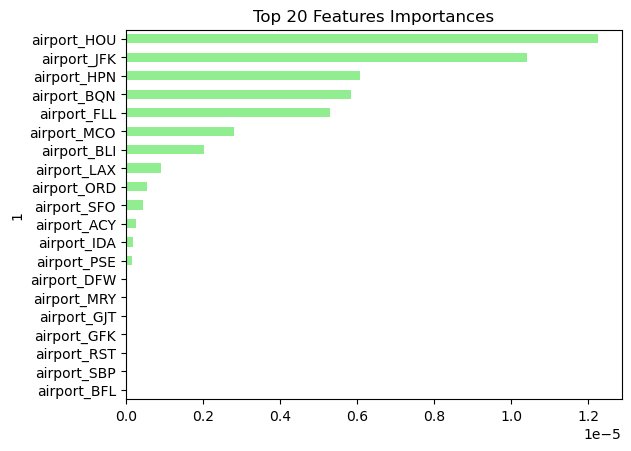

In [40]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
top_features = importances_sorted.head(20)
top_features.plot(kind='barh', color='lightgreen', title= 'Top 20 Features Importances', legend=False)

In [ ]:
# Load dataframe into database

# df.to_sql(name='airline_delays', con=engine, if_exists='append', index=False)
# pd.read_sql_query('select * from airline_delays', con=engine).head()

